# Challenges for week 5

Now that we've seen how to run statistical testing and create supervised machine learning models in Python, it's time for you to apply this knowledge. This week has three challenges. Make sure to give it a try and complete all of them. 

**Some important notes for the challenges:**
1. These challenges are a warming up, and help you get ready for class. Make sure to give them a try. If you get an error message, try to troubleshoot it (using Google often helps). If all else fails, go to the next challenge (but make sure to hand it in).
2. While we of course like when you get all the answers right, the important thing is to exercise and apply the knowledge. So we will still accept challenges that may not be complete, as long as we see enough effort *for each challenge*. This means that if one of the challenges is not delivered (not started and no attempt shown), we unfortunately will not be able to provide a full grade for that week.
3. Delivering the challenge on time on Canvas assignment is critical, as it helps also prepare for the DA live session. Check on Canvas how to hand it in.

### Facing issues? 

We are constantly monitoring the issues on the GitHub general repository (https://github.com/uva-cw-digitalanalytics/2021s2/issues) to help you out. Don't hesitate to log an issue there, explaining well what the problem is, showing the code you are using, and the error message you may be receiving. 

**Important:** We are only monitoring the repository in weekdays, from 9.30 to 17.00. Issues logged after this time will most likely be answered the next day. This means you should now wait for our response before submitting a challenge :-)

## Getting setup for the challenges

We will use the Google Store data that we also saw in the video tutorials. Make sure to either have it by cloning the general repository, or downloading it from surfdrive (see link in the General Repository homepage) and placing it in the same folder as you are running this weekly challenge.


## The case
Our website has launched new campaigns to increase in sales (as binary, converted from **order_euros**) and revenue (**order_euros**). 

We are interested in two campaigns:
* The **referral** campaign
* The **CPC** campaign

We want to know if (a) each campaign led to an increase in sales **compared** to the other campaigns (i.e., any traffic source that is not set as CPC or referral)  and, (b) if one campaign led to more sales than the other.

Both dependent variables (sales and revenue) should come from the *order_euros* variable.  

We also want to understand how the device that someone has, and the location that someone is in, influence sales and revenue. This means you need also to create two additional independent variables:
* At least one binary variable for type of device
* At least one binary variable for location


### Important note:
Because the dataset is very large and it may take some time to run the code, we will select a random sample of 10% of the visits that are in the dataset. Please run the code below (exactly as it is):

## Challenge 1

Create a RQ and hypothesis (or hypotheses) based on the case description above, and prepare the dataset and the variables needed to answer the RQ and hypothesis. 

When everything is done:
* Show the descriptive statistics for the IVs and the DVs
* Create one univariate visualisation per IV
* Create one univariate visualisation per DV
* Create one bivariate visualisation per hypothesis
* Show the descriptives of the DV grouped by the IV
* Provide a brief summary (in MarkDown) with your interpretation of the results

### Tip:
For sales (i.e., whether someone made a purchase or not), you will need to transform a continuous variable (order_euros) into a binary variable (0 = no purchase, 1 = purchase).

In [203]:
import pandas as pd
import seaborn as sns
%matplotlib inline

In [204]:
from sklearn.linear_model import LogisticRegression, LinearRegression
import statsmodels.api as sm
import numpy as np

In [205]:
orders = pd.read_csv('da56_orders.csv.gz')

In [206]:
sessions = pd.read_csv('da56_sessions.csv.gz')

In [207]:
users = pd.read_json('da56_users.jsonl', lines=True)

In [208]:
orders.head()

,Unnamed: 0,session_id,order_euros,purchase
0,0,5555694754,150.00000,1.00000
1,11,5555694765,150.00000,1.00000
2,18,5555694772,150.00000,1.00000
3,19,5555694773,239.00000,1.00000
4,20,5555694774,150.00000,1.00000


In [209]:
len(orders)

11339

In [210]:
orders.columns

Index(['Unnamed: 0', 'session_id', 'order_euros', 'purchase'], dtype='object')

In [211]:
orders.dtypes

Unnamed: 0       int64
session_id       int64
order_euros    float64
purchase       float64
dtype: object

In [212]:
orders.isna().sum()

Unnamed: 0     0
session_id     0
order_euros    0
purchase       0
dtype: int64

In [213]:
orders['purchase'].value_counts()

1.00000    11339
Name: purchase, dtype: int64

In [214]:
orders['order_euros'].describe()

count   11339.00000
mean      178.91366
std        54.82025
min       110.50000
25%       150.00000
50%       150.00000
75%       208.00000
max       487.00000
Name: order_euros, dtype: float64

In [215]:
orders['order_euros'].value_counts()

150.00000    3310
200.00000     594
250.00000     328
114.50000      76
120.00000      75
             ... 
329.50000       1
477.00000       1
434.00000       1
366.50000       1
426.00000       1
Name: order_euros, Length: 383, dtype: int64

In [217]:
def categorise_df(row):
   
    row['user_type'] = 'regular consumer'
    
    if (row['order_euros'] > 180) :
        row['user_type'] = 'high_consumer'
        
    if (row['order_euros'] < 150):
        row['user_type'] = 'cheap_consumer'
    return row
        
    

In [218]:
orders = orders.apply(categorise_df, axis=1)

In [219]:
orders['user_type'].value_counts()

regular consumer    4686
high_consumer       4154
cheap_consumer      2499
Name: user_type, dtype: int64

In [220]:
orders['user_type'].value_counts(normalize=True)

regular consumer   0.41326
high_consumer      0.36635
cheap_consumer     0.22039
Name: user_type, dtype: float64

In [221]:
def recategorize(category):
    if category == 'regular consumer':
        return '0'
    if category == 'high_consumer':
        return '1'
   
    else:
        return '0'

In [222]:
orders['high_consumer'] = orders['user_type'].apply(recategorize)

In [223]:
def recategorize2(category):
    if category == 'regular consumer':
        return '0'
    if category == 'high_consumer':
        return '0'
   
    else:
        return '1'

In [224]:
orders['cheap_consumer'] = orders['user_type'].apply(recategorize2)

In [225]:
def recategorize3(category):
    if category == 'regular consumer':
        return '1'
    if category == 'high_consumer':
        return '0'
   
    else:
        return '0'

In [226]:
orders['regular_consumer'] = orders['user_type'].apply(recategorize3)

In [227]:
orders['user_type'].value_counts()

regular consumer    4686
high_consumer       4154
cheap_consumer      2499
Name: user_type, dtype: int64

In [228]:
orders.isna().sum()

Unnamed: 0          0
session_id          0
order_euros         0
purchase            0
user_type           0
high_consumer       0
cheap_consumer      0
regular_consumer    0
dtype: int64

In [229]:
orders_ = orders[['session_id','order_euros','purchase','user_type','high_consumer','cheap_consumer','regular_consumer']]

In [230]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [231]:
orders_['session_id'] = orders_['session_id'].astype(int)

<ipython-input-231-b6858d15c89b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_['session_id'] = orders_['session_id'].astype(int)


In [232]:
orders_ 

,session_id,order_euros,purchase,user_type,high_consumer,cheap_consumer,regular_consumer
0,5555694754,150.00000,1.00000,regular consumer,0,0,1
1,5555694765,150.00000,1.00000,regular consumer,0,0,1
2,5555694772,150.00000,1.00000,regular consumer,0,0,1
3,5555694773,239.00000,1.00000,high_consumer,1,0,0
4,5555694774,150.00000,1.00000,regular consumer,0,0,1
...,...,...,...,...,...,...,...
11334,5555744732,114.50000,1.00000,cheap_consumer,0,1,0
11335,5555744734,129.50000,1.00000,cheap_consumer,0,1,0
11336,5555744741,150.00000,1.00000,regular consumer,0,0,1
11337,5555744747,170.00000,1.00000,regular consumer,0,0,1


In [234]:
orders_ ['purchase'] = orders_ ['purchase'].astype(int)

<ipython-input-234-1fccca3644de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_ ['purchase'] = orders_ ['purchase'].astype(int)


In [235]:
orders_ 

,session_id,order_euros,purchase,user_type,high_consumer,cheap_consumer,regular_consumer
0,5555694754,150.00000,1,regular consumer,0,0,1
1,5555694765,150.00000,1,regular consumer,0,0,1
2,5555694772,150.00000,1,regular consumer,0,0,1
3,5555694773,239.00000,1,high_consumer,1,0,0
4,5555694774,150.00000,1,regular consumer,0,0,1
...,...,...,...,...,...,...,...
11334,5555744732,114.50000,1,cheap_consumer,0,1,0
11335,5555744734,129.50000,1,cheap_consumer,0,1,0
11336,5555744741,150.00000,1,regular consumer,0,0,1
11337,5555744747,170.00000,1,regular consumer,0,0,1


In [236]:
sessions.head()

,Unnamed: 0,session_id,session_timestamp,user_agent,referral,paid_campaign,user_id
0,0,5555694754,2021-09-20 06:59:09,Mozilla/5.0 (Windows NT 6.2; lo-LA; rv:1.9.1.20) Gecko/2016-06-03 07:20:39 Firefox/3.6.10,google.com,1.00000,NaN
1,1,5555694755,2021-09-23 19:07:17,"Mozilla/5.0 (Windows; U; Windows NT 6.0) AppleWebKit/531.10.5 (KHTML, like Gecko) Version/4.1 Sa...",instagram.com,4.00000,NaN
2,2,5555694756,2021-09-25 14:12:23,Mozilla/5.0 (Android 2.3.6; Mobile; rv:7.0) Gecko/7.0 Firefox/7.0,instagram.com,NaN,NaN
3,3,5555694757,2021-09-20 11:12:36,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT 4.0; Trident/4.0),google.com,NaN,NaN
4,4,5555694758,2021-09-24 11:12:22,Opera/9.52.(X11; Linux i686; bho-IN) Presto/2.9.173 Version/10.00,google.com,2.00000,NaN


In [237]:
len(sessions)

50000

In [239]:
sessions.columns

Index(['Unnamed: 0', 'session_id', 'session_timestamp', 'user_agent',
       'referral', 'paid_campaign', 'user_id'],
      dtype='object')

In [240]:
sessions.dtypes

Unnamed: 0             int64
session_id             int64
session_timestamp     object
user_agent            object
referral              object
paid_campaign        float64
user_id              float64
dtype: object

In [242]:
sessions.isna().sum()

Unnamed: 0               0
session_id               0
session_timestamp        0
user_agent               0
referral                 0
paid_campaign        21569
user_id              34877
dtype: int64

In [243]:
sessions['paid_campaign'].value_counts()

1.00000    7179
3.00000    7157
4.00000    7121
2.00000    6974
Name: paid_campaign, dtype: int64

In [244]:
sessions['referral'].value_counts()

google.com             11168
instagram.com          11136
facebook.com           10938
smith.com                135
johnson.com              104
                       ...  
rivera.org                 1
khan-smith.com             1
farley.info                1
castillo-johns.com         1
humphrey-taylor.org        1
Name: referral, Length: 8630, dtype: int64

In [245]:
sessions['user_agent'].value_counts()

Mozilla/5.0 (compatible; MSIE 8.0; Windows 98; Trident/5.1)                                                                                           40
Mozilla/5.0 (compatible; MSIE 6.0; Windows NT 5.2; Trident/4.0)                                                                                       38
Mozilla/5.0 (compatible; MSIE 5.0; Windows NT 5.1; Trident/5.0)                                                                                       38
Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 5.1; Trident/5.1)                                                                                       37
Mozilla/5.0 (compatible; MSIE 8.0; Windows NT 5.01; Trident/4.1)                                                                                      36
                                                                                                                                                      ..
Mozilla/5.0 (iPod; U; CPU iPhone OS 3_3 like Mac OS X; sv-SE) AppleWebKit/535.16.5

In [246]:
sessions['session_timestamp'] = sessions['session_timestamp'].apply(pd.to_datetime)

In [247]:
sessions.dtypes

Unnamed: 0                    int64
session_id                    int64
session_timestamp    datetime64[ns]
user_agent                   object
referral                     object
paid_campaign               float64
user_id                     float64
dtype: object

In [248]:
sessions ['paid_campaign_no_na'] = sessions['paid_campaign'].fillna(0)

In [250]:
sessions['paid_campaign_no_na'] = sessions['paid_campaign_no_na'].astype(int)

In [251]:
sessions['paid_campaign_no_na'].value_counts()

0    21569
1     7179
3     7157
4     7121
2     6974
Name: paid_campaign_no_na, dtype: int64

## MUCH MUCH MUCH FASTER THAN CREATING SINGLE CATEGORIES

In [258]:
def word_present(text, query):
    import re
    text = str(text).lower()
    query = str(query).lower()
    
    tokens = re.findall(r"[\w']+|[.,!?;$@#]", text)
    if query in tokens:
        return 1
    return 0

In [259]:
sessions['campaign1'] = sessions['paid_campaign_no_na'].apply(word_present, args= ('1',))
sessions['campaign2'] = sessions['paid_campaign_no_na'].apply(word_present, args= ('2',))
sessions['campaign3'] = sessions['paid_campaign_no_na'].apply(word_present, args= ('3',))
sessions['campaign4'] = sessions['paid_campaign_no_na'].apply(word_present, args= ('4',))
sessions['Other_campaigns'] = sessions['paid_campaign_no_na'].apply(word_present, args= ('0',))

In [260]:
sessions

,Unnamed: 0,session_id,session_timestamp,user_agent,referral,paid_campaign,user_id,paid_campaign_no_na,campaign1,campaign2,campaign3,campaign4,Other_campaigns
0,0,5555694754,2021-09-20 06:59:09,Mozilla/5.0 (Windows NT 6.2; lo-LA; rv:1.9.1.20) Gecko/2016-06-03 07:20:39 Firefox/3.6.10,google.com,1.00000,NaN,1,1,0,0,0,0
1,1,5555694755,2021-09-23 19:07:17,"Mozilla/5.0 (Windows; U; Windows NT 6.0) AppleWebKit/531.10.5 (KHTML, like Gecko) Version/4.1 Sa...",instagram.com,4.00000,NaN,4,0,0,0,1,0
2,2,5555694756,2021-09-25 14:12:23,Mozilla/5.0 (Android 2.3.6; Mobile; rv:7.0) Gecko/7.0 Firefox/7.0,instagram.com,NaN,NaN,0,0,0,0,0,1
3,3,5555694757,2021-09-20 11:12:36,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT 4.0; Trident/4.0),google.com,NaN,NaN,0,0,0,0,0,1
4,4,5555694758,2021-09-24 11:12:22,Opera/9.52.(X11; Linux i686; bho-IN) Presto/2.9.173 Version/10.00,google.com,2.00000,NaN,2,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49995,5555744749,2021-09-21 21:13:43,"Mozilla/5.0 (Macintosh; PPC Mac OS X 10 5_1 rv:5.0; xh-ZA) AppleWebKit/533.23.2 (KHTML, like Gec...",morales-patel.com,4.00000,NaN,4,0,0,0,1,0
49996,49996,5555744750,2021-09-20 05:27:21,Mozilla/5.0 (X11; Linux i686; rv:1.9.6.20) Gecko/2019-12-08 06:49:06 Firefox/10.0,stark.com,1.00000,NaN,1,1,0,0,0,0
49997,49997,5555744751,2021-09-28 21:29:37,"Mozilla/5.0 (Windows; U; Windows NT 6.1) AppleWebKit/535.34.1 (KHTML, like Gecko) Version/4.1 Sa...",instagram.com,1.00000,55886019.00000,1,1,0,0,0,0
49998,49998,5555744752,2021-09-25 19:33:29,"Mozilla/5.0 (iPod; U; CPU iPhone OS 3_1 like Mac OS X; ve-ZA) AppleWebKit/532.45.7 (KHTML, like ...",google.com,NaN,NaN,0,0,0,0,0,1


## Creating categories one by one here (the same from the step above)

In [158]:
def recategorize(category):
    if category == 1.0:
        return '1'
    
    else:
        return '0'

In [148]:
sessions['campaign1'] = sessions['paid_campaign_no_na'].apply(recategorize)

In [176]:
sessions['campaign1'].value_counts()

0    42821
1     7179
Name: campaign1, dtype: int64

In [150]:
def recategorize(category):
    if category == 2.0:
        return '1'
    
    else:
        return '0'

In [151]:
sessions['campaign2'] = sessions['paid_campaign_no_na'].apply(recategorize)

In [177]:
sessions['campaign2'].value_counts()

0    43026
1     6974
Name: campaign2, dtype: int64

In [152]:
def recategorize(category):
    if category == 3.0:
        return '1'
    
    else:
        return '0'

In [153]:
sessions['campaign3'] = sessions['paid_campaign_no_na'].apply(recategorize)

In [178]:
sessions['campaign3'].value_counts()

0    42843
1     7157
Name: campaign3, dtype: int64

In [154]:
def recategorize(category):
    if category == 4.0:
        return '1'
    
    else:
        return '0'

In [155]:
sessions['campaign4'] = sessions['paid_campaign_no_na'].apply(recategorize)

In [179]:
sessions['campaign4'].value_counts()

0    42879
1     7121
Name: campaign4, dtype: int64

In [183]:
def recategorize(category):
    if category == 0.0:
        return '1'
    
    else:
        return '0'

In [184]:
sessions['Other_campaign'] = sessions['paid_campaign_no_na'].apply(recategorize)

In [189]:
sessions

,Unnamed: 0,session_id,session_timestamp,user_agent,referral,paid_campaign,user_id,paid_campaign_no_na,campaign1,campaign2,campaign3,campaign4,Google,Instagram,Facebook,ref_category,Others,Other_campaign,Other_referral
0,0,5555694754,2021-09-20 06:59:09,Mozilla/5.0 (Windows NT 6.2; lo-LA; rv:1.9.1.20) Gecko/2016-06-03 07:20:39 Firefox/3.6.10,google.com,1.00000,NaN,1.00000,1,0,0,0,1,0,0,Google,0,0,0
1,1,5555694755,2021-09-23 19:07:17,"Mozilla/5.0 (Windows; U; Windows NT 6.0) AppleWebKit/531.10.5 (KHTML, like Gecko) Version/4.1 Sa...",instagram.com,4.00000,NaN,4.00000,0,0,0,1,0,1,0,Instagram,0,0,0
2,2,5555694756,2021-09-25 14:12:23,Mozilla/5.0 (Android 2.3.6; Mobile; rv:7.0) Gecko/7.0 Firefox/7.0,instagram.com,NaN,NaN,other_campaigns,0,0,0,0,0,1,0,Instagram,0,0,0
3,3,5555694757,2021-09-20 11:12:36,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT 4.0; Trident/4.0),google.com,NaN,NaN,other_campaigns,0,0,0,0,1,0,0,Google,0,0,0
4,4,5555694758,2021-09-24 11:12:22,Opera/9.52.(X11; Linux i686; bho-IN) Presto/2.9.173 Version/10.00,google.com,2.00000,NaN,2.00000,0,1,0,0,1,0,0,Google,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49995,5555744749,2021-09-21 21:13:43,"Mozilla/5.0 (Macintosh; PPC Mac OS X 10 5_1 rv:5.0; xh-ZA) AppleWebKit/533.23.2 (KHTML, like Gec...",morales-patel.com,4.00000,NaN,4.00000,0,0,0,1,0,0,0,Other,1,0,1
49996,49996,5555744750,2021-09-20 05:27:21,Mozilla/5.0 (X11; Linux i686; rv:1.9.6.20) Gecko/2019-12-08 06:49:06 Firefox/10.0,stark.com,1.00000,NaN,1.00000,1,0,0,0,0,0,0,Other,1,0,1
49997,49997,5555744751,2021-09-28 21:29:37,"Mozilla/5.0 (Windows; U; Windows NT 6.1) AppleWebKit/535.34.1 (KHTML, like Gecko) Version/4.1 Sa...",instagram.com,1.00000,55886019.00000,1.00000,1,0,0,0,0,1,0,Instagram,0,0,0
49998,49998,5555744752,2021-09-25 19:33:29,"Mozilla/5.0 (iPod; U; CPU iPhone OS 3_1 like Mac OS X; ve-ZA) AppleWebKit/532.45.7 (KHTML, like ...",google.com,NaN,NaN,other_campaigns,0,0,0,0,1,0,0,Google,0,0,0


In [261]:
def recategorize(category):
    if category == 'google.com':
        return 'Google'
    if category == 'instagram.com':
        return 'Instagram'
    if category == 'facebook.com':
        return 'Facebook'
   
    else:
        return 'Other'

In [262]:
sessions['ref_category'] = sessions['referral'].apply(recategorize)

In [263]:
sessions.head()

,Unnamed: 0,session_id,session_timestamp,user_agent,referral,paid_campaign,user_id,paid_campaign_no_na,campaign1,campaign2,campaign3,campaign4,Other_campaigns,ref_category
0,0,5555694754,2021-09-20 06:59:09,Mozilla/5.0 (Windows NT 6.2; lo-LA; rv:1.9.1.20) Gecko/2016-06-03 07:20:39 Firefox/3.6.10,google.com,1.00000,NaN,1,1,0,0,0,0,Google
1,1,5555694755,2021-09-23 19:07:17,"Mozilla/5.0 (Windows; U; Windows NT 6.0) AppleWebKit/531.10.5 (KHTML, like Gecko) Version/4.1 Sa...",instagram.com,4.00000,NaN,4,0,0,0,1,0,Instagram
2,2,5555694756,2021-09-25 14:12:23,Mozilla/5.0 (Android 2.3.6; Mobile; rv:7.0) Gecko/7.0 Firefox/7.0,instagram.com,NaN,NaN,0,0,0,0,0,1,Instagram
3,3,5555694757,2021-09-20 11:12:36,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT 4.0; Trident/4.0),google.com,NaN,NaN,0,0,0,0,0,1,Google
4,4,5555694758,2021-09-24 11:12:22,Opera/9.52.(X11; Linux i686; bho-IN) Presto/2.9.173 Version/10.00,google.com,2.00000,NaN,2,0,1,0,0,0,Google


In [264]:
def wordlist_any_present(text, query):
    import re
    text = str(text).lower()
    newquery = []
    for word in query:
        newquery.append(str(word).lower())
    tokens = re.findall(r"[\w']+|[.,!?;$@#]", text)
    
    for word in newquery:
        if word in tokens:
            return 1
    return 0


In [265]:
sessions['Google'] = sessions['referral'].apply(wordlist_any_present,args=(['google'],))

In [266]:
sessions['Google'].value_counts()

0    38832
1    11168
Name: Google, dtype: int64

In [267]:
sessions['Instagram'] = sessions['referral'].apply(wordlist_any_present,args=(['instagram'],))

In [268]:
sessions['Instagram'].value_counts()

0    38864
1    11136
Name: Instagram, dtype: int64

In [269]:
sessions['Facebook'] = sessions['referral'].apply(wordlist_any_present,args=(['facebook'],))

In [270]:
sessions['Facebook'].value_counts()

0    39062
1    10938
Name: Facebook, dtype: int64

In [271]:
sessions['Other_referral'] = sessions['ref_category'].apply(wordlist_any_present,args=(['Other'],))

In [272]:
sessions['Other_referral'].value_counts()

0    33242
1    16758
Name: Other_referral, dtype: int64

In [273]:
pd.options.display.max_colwidth = 100

In [274]:
sessions.isna().sum()

Unnamed: 0                 0
session_id                 0
session_timestamp          0
user_agent                 0
referral                   0
paid_campaign          21569
user_id                34877
paid_campaign_no_na        0
campaign1                  0
campaign2                  0
campaign3                  0
campaign4                  0
Other_campaigns            0
ref_category               0
Google                     0
Instagram                  0
Facebook                   0
Other_referral             0
dtype: int64

In [374]:
sessions_ = sessions[['session_id','user_id','paid_campaign_no_na','campaign1','campaign2','campaign3','campaign4','Other_campaigns','ref_category','Google','Instagram','Facebook','Other_referral']]

In [277]:
sessions_

,session_id,paid_campaign_no_na,campaign1,campaign2,campaign3,campaign4,Other_campaigns,ref_category,Google,Instagram,Facebook,Other_referral
0,5555694754,1,1,0,0,0,0,Google,1,0,0,0
1,5555694755,4,0,0,0,1,0,Instagram,0,1,0,0
2,5555694756,0,0,0,0,0,1,Instagram,0,1,0,0
3,5555694757,0,0,0,0,0,1,Google,1,0,0,0
4,5555694758,2,0,1,0,0,0,Google,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,5555744749,4,0,0,0,1,0,Other,0,0,0,1
49996,5555744750,1,1,0,0,0,0,Other,0,0,0,1
49997,5555744751,1,1,0,0,0,0,Instagram,0,1,0,0
49998,5555744752,0,0,0,0,0,1,Google,1,0,0,0


In [278]:
def recategorize(category):
    if category == 1:
        return 'Campaign_1'
    if category == 2:
        return 'Campaign_2'
    if category == 3:
        return 'Campaign_3'
    if category == 4:
        return 'Campaign_4'
   
    else:
        return 'Other'

In [279]:
sessions_['paid_campaign_no_na'] = sessions_['paid_campaign_no_na'].apply(recategorize)

<ipython-input-279-3305b0419e7c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sessions_['paid_campaign_no_na'] = sessions_['paid_campaign_no_na'].apply(recategorize)


In [375]:
sessions_

,session_id,user_id,paid_campaign_no_na,campaign1,campaign2,campaign3,campaign4,Other_campaigns,ref_category,Google,Instagram,Facebook,Other_referral
0,5555694754,NaN,1,1,0,0,0,0,Google,1,0,0,0
1,5555694755,NaN,4,0,0,0,1,0,Instagram,0,1,0,0
2,5555694756,NaN,0,0,0,0,0,1,Instagram,0,1,0,0
3,5555694757,NaN,0,0,0,0,0,1,Google,1,0,0,0
4,5555694758,NaN,2,0,1,0,0,0,Google,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,5555744749,NaN,4,0,0,0,1,0,Other,0,0,0,1
49996,5555744750,NaN,1,1,0,0,0,0,Other,0,0,0,1
49997,5555744751,55886019.00000,1,1,0,0,0,0,Instagram,0,1,0,0
49998,5555744752,NaN,0,0,0,0,0,1,Google,1,0,0,0


In [285]:
users.head()

,user_info
0,"{'id': '55885858', 'reg_name': 'Melissa Hanson', 'age': 21, 'registration_date': '2019-10-29', '..."
1,"{'id': '55885859', 'reg_name': 'Danielle Evans', 'age': 20, 'registration_date': '2019-11-08', '..."
2,"{'id': '55885860', 'reg_name': 'Erika Horton', 'age': 18, 'registration_date': '2021-01-27', 'in..."
3,"{'id': '55885861', 'reg_name': 'Nicole Campbell', 'age': 46, 'registration_date': '2020-06-21', ..."
4,"{'id': '55885862', 'reg_name': 'Jessica Sanchez', 'age': 64, 'registration_date': '2020-02-15', ..."


In [286]:
def expand_dictionary(row, columnname=''):
    if columnname == '':
        return row
    if type(row[columnname]) != dict:
        return row
    for key, value in row[columnname].items():
        if type(value) != dict:
            row[key] = value
        else:
            for subkey, subvalue in row[columnname][key].items():
                if type(subvalue) != dict:
                    row[str(key)+'_'+str(subkey)] = subvalue
                else:
                    for subsubkey, subsubvalue in row[columnname][key][subkey].items():
                        row[str(key)+'_'+str(subkey)+'_'+str(subsubkey)] = subsubvalue
                
        
    return row 

In [287]:
users = users.apply(expand_dictionary, axis=1, args=('user_info',))

In [288]:
users.head()

,age,id,initial_referrer,preferential_client,reg_name,registration_date,user_info
0,21,55885858,instagram.com,NaN,Melissa Hanson,2019-10-29,"{'id': '55885858', 'reg_name': 'Melissa Hanson', 'age': 21, 'registration_date': '2019-10-29', '..."
1,20,55885859,instagram.com,NaN,Danielle Evans,2019-11-08,"{'id': '55885859', 'reg_name': 'Danielle Evans', 'age': 20, 'registration_date': '2019-11-08', '..."
2,18,55885860,google.com,NaN,Erika Horton,2021-01-27,"{'id': '55885860', 'reg_name': 'Erika Horton', 'age': 18, 'registration_date': '2021-01-27', 'in..."
3,46,55885861,google.com,NaN,Nicole Campbell,2020-06-21,"{'id': '55885861', 'reg_name': 'Nicole Campbell', 'age': 46, 'registration_date': '2020-06-21', ..."
4,64,55885862,massey.com,NaN,Jessica Sanchez,2020-02-15,"{'id': '55885862', 'reg_name': 'Jessica Sanchez', 'age': 64, 'registration_date': '2020-02-15', ..."


In [289]:
users = users[['age','id','initial_referrer','preferential_client','reg_name','registration_date']]

In [290]:
users.head()

,age,id,initial_referrer,preferential_client,reg_name,registration_date
0,21,55885858,instagram.com,NaN,Melissa Hanson,2019-10-29
1,20,55885859,instagram.com,NaN,Danielle Evans,2019-11-08
2,18,55885860,google.com,NaN,Erika Horton,2021-01-27
3,46,55885861,google.com,NaN,Nicole Campbell,2020-06-21
4,64,55885862,massey.com,NaN,Jessica Sanchez,2020-02-15


In [291]:
len(users)

1000

In [292]:
users['initial_referrer'].value_counts()

facebook.com          305
google.com            277
instagram.com         270
davis.com               2
roman.com               1
                     ... 
house-davis.biz         1
anderson-davis.biz      1
white.biz               1
schmidt.com             1
george.com              1
Name: initial_referrer, Length: 150, dtype: int64

In [293]:
users.isna().sum()

age                      0
id                       0
initial_referrer         0
preferential_client    831
reg_name                 0
registration_date        0
dtype: int64

In [297]:
users.dtypes

age                      int64
id                      object
initial_referrer        object
preferential_client    float64
reg_name                object
registration_date       object
dtype: object

In [294]:
users['preferential_client'].value_counts()

1.00000    169
Name: preferential_client, dtype: int64

In [295]:
users['preferential_client'] = users['preferential_client'].fillna(0)

In [296]:
users['preferential_client'].value_counts()

0.00000    831
1.00000    169
Name: preferential_client, dtype: int64

In [298]:
users['registration_date'] = users['registration_date'].apply(pd.to_datetime)

In [299]:
users.dtypes

age                             int64
id                             object
initial_referrer               object
preferential_client           float64
reg_name                       object
registration_date      datetime64[ns]
dtype: object

In [301]:
users['preferential_client'] = users['preferential_client'].astype(int)

In [302]:
users.head()

,age,id,initial_referrer,preferential_client,reg_name,registration_date
0,21,55885858,instagram.com,0,Melissa Hanson,2019-10-29
1,20,55885859,instagram.com,0,Danielle Evans,2019-11-08
2,18,55885860,google.com,0,Erika Horton,2021-01-27
3,46,55885861,google.com,0,Nicole Campbell,2020-06-21
4,64,55885862,massey.com,0,Jessica Sanchez,2020-02-15


In [304]:
users['initial_referrer'].value_counts()

facebook.com          305
google.com            277
instagram.com         270
davis.com               2
roman.com               1
                     ... 
house-davis.biz         1
anderson-davis.biz      1
white.biz               1
schmidt.com             1
george.com              1
Name: initial_referrer, Length: 150, dtype: int64

In [310]:
def recategorize(category):
    if category == 'google.com':
        return 'Google'
    if category == 'instagram.com':
        return 'Instagram'
    if category == 'facebook.com':
        return 'Facebook'
   
    else:
        return 'Other'

In [311]:
users['initial_referrer'] = users['initial_referrer'].apply(recategorize)

In [314]:
users.head()

,age,id,initial_referrer,preferential_client,reg_name,registration_date
0,21,55885858,Instagram,0,Melissa Hanson,2019-10-29
1,20,55885859,Instagram,0,Danielle Evans,2019-11-08
2,18,55885860,Google,0,Erika Horton,2021-01-27
3,46,55885861,Google,0,Nicole Campbell,2020-06-21
4,64,55885862,Other,0,Jessica Sanchez,2020-02-15


In [315]:
def wordlist_any_present(text, query):
    import re
    text = str(text).lower()
    newquery = []
    for word in query:
        newquery.append(str(word).lower())
    tokens = re.findall(r"[\w']+|[.,!?;$@#]", text)
    
    for word in newquery:
        if word in tokens:
            return 1
    return 0

In [316]:
users['IN_Facebook'] = users['initial_referrer'].apply(wordlist_any_present,args=(['Facebook'],))
users['IN_Google'] = users['initial_referrer'].apply(wordlist_any_present,args=(['Google'],))
users['IN_Instagram'] = users['initial_referrer'].apply(wordlist_any_present,args=(['Instagram'],))
users['IN_Other'] = users['initial_referrer'].apply(wordlist_any_present,args=(['Other'],))


In [317]:
users.head()

,age,id,initial_referrer,preferential_client,reg_name,registration_date,IN_Facebook,IN_Google,IN_Instagram,IN_Other
0,21,55885858,Instagram,0,Melissa Hanson,2019-10-29,0,0,1,0
1,20,55885859,Instagram,0,Danielle Evans,2019-11-08,0,0,1,0
2,18,55885860,Google,0,Erika Horton,2021-01-27,0,1,0,0
3,46,55885861,Google,0,Nicole Campbell,2020-06-21,0,1,0,0
4,64,55885862,Other,0,Jessica Sanchez,2020-02-15,0,0,0,1


In [318]:
users_ = users[['id','initial_referrer','preferential_client','IN_Facebook','IN_Google','IN_Instagram','IN_Other']]

In [320]:
len(sessions_)

50000

In [321]:
len(orders_)

11339

In [319]:
len(orders_.merge(sessions_, on='session_id', how='left'))

11339

In [322]:
len(orders_.merge(sessions_, on='session_id', how='right'))

50000

In [325]:
len(orders_.merge(sessions_, on='session_id', how='inner'))

11339

In [324]:
len(orders_.merge(sessions_, on='session_id', how='outer'))

50000

In [376]:
final_1 = orders_.merge(sessions_, on='session_id', how='outer')

In [377]:
final_1

,session_id,order_euros,purchase,user_type,high_consumer,cheap_consumer,regular_consumer,user_id,paid_campaign_no_na,campaign1,campaign2,campaign3,campaign4,Other_campaigns,ref_category,Google,Instagram,Facebook,Other_referral
0,5555694754,150.00000,1.00000,regular consumer,0,0,1,NaN,1,1,0,0,0,0,Google,1,0,0,0
1,5555694765,150.00000,1.00000,regular consumer,0,0,1,NaN,1,1,0,0,0,0,Google,1,0,0,0
2,5555694772,150.00000,1.00000,regular consumer,0,0,1,NaN,3,0,0,1,0,0,Google,1,0,0,0
3,5555694773,239.00000,1.00000,high_consumer,1,0,0,55886438.00000,4,0,0,0,1,0,Other,0,0,0,1
4,5555694774,150.00000,1.00000,regular consumer,0,0,1,NaN,1,1,0,0,0,0,Google,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,5555744748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,1,Google,1,0,0,0
49996,5555744749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0,0,0,1,0,Other,0,0,0,1
49997,5555744750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0,0,Other,0,0,0,1
49998,5555744751,NaN,NaN,NaN,NaN,NaN,NaN,55886019.00000,1,1,0,0,0,0,Instagram,0,1,0,0


In [328]:
len(users_)

1000

In [378]:
final_1.isna().sum()

session_id                 0
order_euros            38661
purchase               38661
user_type              38661
high_consumer          38661
cheap_consumer         38661
regular_consumer       38661
user_id                34877
paid_campaign_no_na        0
campaign1                  0
campaign2                  0
campaign3                  0
campaign4                  0
Other_campaigns            0
ref_category               0
Google                     0
Instagram                  0
Facebook                   0
Other_referral             0
dtype: int64

In [379]:
final_1['order_euros'] = final_1['order_euros'].fillna(0)
final_1['purchase'] = final_1['purchase'].fillna(0)

In [380]:
final_1.isna().sum()

session_id                 0
order_euros                0
purchase                   0
user_type              38661
high_consumer          38661
cheap_consumer         38661
regular_consumer       38661
user_id                34877
paid_campaign_no_na        0
campaign1                  0
campaign2                  0
campaign3                  0
campaign4                  0
Other_campaigns            0
ref_category               0
Google                     0
Instagram                  0
Facebook                   0
Other_referral             0
dtype: int64

In [381]:
final_1.dtypes

session_id               int64
order_euros            float64
purchase               float64
user_type               object
high_consumer           object
cheap_consumer          object
regular_consumer        object
user_id                float64
paid_campaign_no_na      int64
campaign1                int64
campaign2                int64
campaign3                int64
campaign4                int64
Other_campaigns          int64
ref_category            object
Google                   int64
Instagram                int64
Facebook                 int64
Other_referral           int64
dtype: object

In [382]:
final_1['purchase'] = final_1['purchase'].astype(int)

In [383]:
def recategorize(category):
    if category == 'regular consumer':
        return 'regular_consumer'
    if category == 'high_consumer':
        return 'high_consumer'
    if category == 'cheap_consumer':
        return 'cheap_consumer'
   
    else:
        return 'non_consumer'

In [384]:
final_1['user_type'] = final_1['user_type'].apply(recategorize)

In [385]:
final_1['user_type'].value_counts()

non_consumer        38661
regular_consumer     4686
high_consumer        4154
cheap_consumer       2499
Name: user_type, dtype: int64

In [386]:
def recategorize(category):
    if category == 'non_consumer':
        return '1'
   
    else:
        return '0'

In [387]:
final_1['non_consumers'] = final_1['user_type'].apply(recategorize)

In [388]:
def recategorize(category):
    if category == 'high_consumer':
        return '1'
   
    else:
        return '0'

In [389]:
final_1['high_consumer'] = final_1['user_type'].apply(recategorize)

In [390]:
def recategorize(category):
    if category == 'cheap_consumer':
        return '1'
   
    else:
        return '0'

In [391]:
final_1['cheap_consumer'] = final_1['user_type'].apply(recategorize)

In [392]:
def recategorize(category):
    if category == 'regular_consumer':
        return '1'
   
    else:
        return '0'

In [393]:
final_1['regular_consumer'] = final_1['user_type'].apply(recategorize)

In [394]:
final_1

,session_id,order_euros,purchase,user_type,high_consumer,cheap_consumer,regular_consumer,user_id,paid_campaign_no_na,campaign1,campaign2,campaign3,campaign4,Other_campaigns,ref_category,Google,Instagram,Facebook,Other_referral,non_consumers
0,5555694754,150.00000,1,regular_consumer,0,0,1,NaN,1,1,0,0,0,0,Google,1,0,0,0,0
1,5555694765,150.00000,1,regular_consumer,0,0,1,NaN,1,1,0,0,0,0,Google,1,0,0,0,0
2,5555694772,150.00000,1,regular_consumer,0,0,1,NaN,3,0,0,1,0,0,Google,1,0,0,0,0
3,5555694773,239.00000,1,high_consumer,1,0,0,55886438.00000,4,0,0,0,1,0,Other,0,0,0,1,0
4,5555694774,150.00000,1,regular_consumer,0,0,1,NaN,1,1,0,0,0,0,Google,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,5555744748,0.00000,0,non_consumer,0,0,0,NaN,0,0,0,0,0,1,Google,1,0,0,0,1
49996,5555744749,0.00000,0,non_consumer,0,0,0,NaN,4,0,0,0,1,0,Other,0,0,0,1,1
49997,5555744750,0.00000,0,non_consumer,0,0,0,NaN,1,1,0,0,0,0,Other,0,0,0,1,1
49998,5555744751,0.00000,0,non_consumer,0,0,0,55886019.00000,1,1,0,0,0,0,Instagram,0,1,0,0,1


In [395]:
final_1.isna().sum()

session_id                 0
order_euros                0
purchase                   0
user_type                  0
high_consumer              0
cheap_consumer             0
regular_consumer           0
user_id                34877
paid_campaign_no_na        0
campaign1                  0
campaign2                  0
campaign3                  0
campaign4                  0
Other_campaigns            0
ref_category               0
Google                     0
Instagram                  0
Facebook                   0
Other_referral             0
non_consumers              0
dtype: int64

In [396]:
final_1 = final_1[['session_id','user_id','order_euros','purchase','user_type','non_consumers','cheap_consumer','regular_consumer','high_consumer','paid_campaign_no_na','campaign1','campaign2','campaign3','campaign4','Other_campaigns','ref_category','Google','Instagram','Facebook','Other_referral']]                                                                             

In [397]:
final_1

,session_id,user_id,order_euros,purchase,user_type,non_consumers,cheap_consumer,regular_consumer,high_consumer,paid_campaign_no_na,campaign1,campaign2,campaign3,campaign4,Other_campaigns,ref_category,Google,Instagram,Facebook,Other_referral
0,5555694754,NaN,150.00000,1,regular_consumer,0,0,1,0,1,1,0,0,0,0,Google,1,0,0,0
1,5555694765,NaN,150.00000,1,regular_consumer,0,0,1,0,1,1,0,0,0,0,Google,1,0,0,0
2,5555694772,NaN,150.00000,1,regular_consumer,0,0,1,0,3,0,0,1,0,0,Google,1,0,0,0
3,5555694773,55886438.00000,239.00000,1,high_consumer,0,0,0,1,4,0,0,0,1,0,Other,0,0,0,1
4,5555694774,NaN,150.00000,1,regular_consumer,0,0,1,0,1,1,0,0,0,0,Google,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,5555744748,NaN,0.00000,0,non_consumer,1,0,0,0,0,0,0,0,0,1,Google,1,0,0,0
49996,5555744749,NaN,0.00000,0,non_consumer,1,0,0,0,4,0,0,0,1,0,Other,0,0,0,1
49997,5555744750,NaN,0.00000,0,non_consumer,1,0,0,0,1,1,0,0,0,0,Other,0,0,0,1
49998,5555744751,55886019.00000,0.00000,0,non_consumer,1,0,0,0,1,1,0,0,0,0,Instagram,0,1,0,0


In [398]:
final_1.dtypes

session_id               int64
user_id                float64
order_euros            float64
purchase                 int64
user_type               object
non_consumers           object
cheap_consumer          object
regular_consumer        object
high_consumer           object
paid_campaign_no_na      int64
campaign1                int64
campaign2                int64
campaign3                int64
campaign4                int64
Other_campaigns          int64
ref_category            object
Google                   int64
Instagram                int64
Facebook                 int64
Other_referral           int64
dtype: object

In [399]:
users_.dtypes

id                     object
initial_referrer       object
preferential_client     int64
IN_Facebook             int64
IN_Google               int64
IN_Instagram            int64
IN_Other                int64
dtype: object

In [403]:
users_['id'] = users_['id'].astype(float)

<ipython-input-403-6cd4388fb796>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_['id'] = users_['id'].astype(float)


In [404]:
users_.dtypes

id                     float64
initial_referrer        object
preferential_client      int64
IN_Facebook              int64
IN_Google                int64
IN_Instagram             int64
IN_Other                 int64
dtype: object

In [405]:
users_.rename(columns = {'id':'user_id'}, inplace = True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [406]:
users_.isna().sum()

user_id                0
initial_referrer       0
preferential_client    0
IN_Facebook            0
IN_Google              0
IN_Instagram           0
IN_Other               0
dtype: int64

In [407]:
len(final_1.merge(users_, on='user_id', how='left'))

50000

In [408]:
final = final_1.merge(users_, on='user_id', how='left')

In [420]:
final

,session_id,user_id,order_euros,purchase,user_type,non_consumers,cheap_consumer,regular_consumer,high_consumer,paid_campaign_no_na,...,campaign2,campaign3,campaign4,Other_campaigns,ref_category,Google,Instagram,Facebook,Other_referral,preferential_client
0,5555694754,NaN,150.00000,1,regular_consumer,0,0,1,0,1,...,0,0,0,0,Google,1,0,0,0,0.00000
1,5555694765,NaN,150.00000,1,regular_consumer,0,0,1,0,1,...,0,0,0,0,Google,1,0,0,0,0.00000
2,5555694772,NaN,150.00000,1,regular_consumer,0,0,1,0,3,...,0,1,0,0,Google,1,0,0,0,0.00000
3,5555694773,55886438.00000,239.00000,1,high_consumer,0,0,0,1,4,...,0,0,1,0,Other,0,0,0,1,1.00000
4,5555694774,NaN,150.00000,1,regular_consumer,0,0,1,0,1,...,0,0,0,0,Google,1,0,0,0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,5555744748,NaN,0.00000,0,non_consumer,1,0,0,0,0,...,0,0,0,1,Google,1,0,0,0,0.00000
49996,5555744749,NaN,0.00000,0,non_consumer,1,0,0,0,4,...,0,0,1,0,Other,0,0,0,1,0.00000
49997,5555744750,NaN,0.00000,0,non_consumer,1,0,0,0,1,...,0,0,0,0,Other,0,0,0,1,0.00000
49998,5555744751,55886019.00000,0.00000,0,non_consumer,1,0,0,0,1,...,0,0,0,0,Instagram,0,1,0,0,0.00000


In [418]:
final.isna().sum()

session_id                 0
user_id                34877
order_euros                0
purchase                   0
user_type                  0
non_consumers              0
cheap_consumer             0
regular_consumer           0
high_consumer              0
paid_campaign_no_na        0
campaign1                  0
campaign2                  0
campaign3                  0
campaign4                  0
Other_campaigns            0
ref_category               0
Google                     0
Instagram                  0
Facebook                   0
Other_referral             0
preferential_client    34877
dtype: int64

In [419]:
final['preferential_client'] = final['preferential_client'].fillna(0)

In [421]:
final['preferential_client'] = final['preferential_client'].astype(int)

In [424]:
final

,session_id,user_id,order_euros,purchase,user_type,non_consumers,cheap_consumer,regular_consumer,high_consumer,paid_campaign_no_na,...,campaign2,campaign3,campaign4,Other_campaigns,ref_category,Google,Instagram,Facebook,Other_referral,preferential_client
0,5555694754,0.00000,150.00000,1,regular_consumer,0,0,1,0,1,...,0,0,0,0,Google,1,0,0,0,0
1,5555694765,0.00000,150.00000,1,regular_consumer,0,0,1,0,1,...,0,0,0,0,Google,1,0,0,0,0
2,5555694772,0.00000,150.00000,1,regular_consumer,0,0,1,0,3,...,0,1,0,0,Google,1,0,0,0,0
3,5555694773,55886438.00000,239.00000,1,high_consumer,0,0,0,1,4,...,0,0,1,0,Other,0,0,0,1,1
4,5555694774,0.00000,150.00000,1,regular_consumer,0,0,1,0,1,...,0,0,0,0,Google,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,5555744748,0.00000,0.00000,0,non_consumer,1,0,0,0,0,...,0,0,0,1,Google,1,0,0,0,0
49996,5555744749,0.00000,0.00000,0,non_consumer,1,0,0,0,4,...,0,0,1,0,Other,0,0,0,1,0
49997,5555744750,0.00000,0.00000,0,non_consumer,1,0,0,0,1,...,0,0,0,0,Other,0,0,0,1,0
49998,5555744751,55886019.00000,0.00000,0,non_consumer,1,0,0,0,1,...,0,0,0,0,Instagram,0,1,0,0,0


In [423]:
final['user_id']=final['user_id'].fillna(0)

In [425]:
final['user_id'] = final['user_id'].astype(int)

In [427]:
final.isna().sum()

session_id             0
user_id                0
order_euros            0
purchase               0
user_type              0
non_consumers          0
cheap_consumer         0
regular_consumer       0
high_consumer          0
paid_campaign_no_na    0
campaign1              0
campaign2              0
campaign3              0
campaign4              0
Other_campaigns        0
ref_category           0
Google                 0
Instagram              0
Facebook               0
Other_referral         0
preferential_client    0
dtype: int64

In [428]:
pd.set_option('display.max_columns', 21)

final

In [432]:
final[['order_euros','purchase']].describe()

,order_euros,purchase
count,50000.00000,50000.00000
mean,40.57404,0.22678
std,79.33849,0.41875
min,0.00000,0.00000
25%,0.00000,0.00000
50%,0.00000,0.00000
75%,0.00000,0.00000
max,487.00000,1.00000


In [434]:
final['user_type'].value_counts()

non_consumer        38661
regular_consumer     4686
high_consumer        4154
cheap_consumer       2499
Name: user_type, dtype: int64

In [435]:
final['ref_category'].value_counts()

Other        16758
Google       11168
Instagram    11136
Facebook     10938
Name: ref_category, dtype: int64

purchase & order_euros = DVs

paid_campaign_no_na &  ref_category = IVs

user_type &  ref_category = control variasbles 

<AxesSubplot:xlabel='purchase', ylabel='count'>

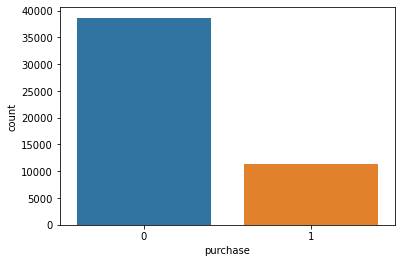

In [436]:
sns.countplot(x='purchase', data=final)

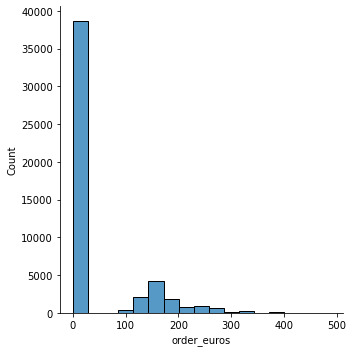

In [437]:
sns.displot(final['order_euros']) 

<AxesSubplot:xlabel='count', ylabel='paid_campaign_no_na'>

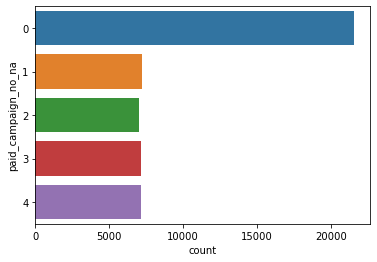

In [439]:
sns.countplot(y='paid_campaign_no_na', data=final)

<AxesSubplot:xlabel='count', ylabel='ref_category'>

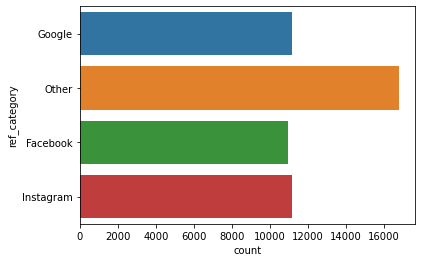

In [440]:
sns.countplot(y='ref_category', data=final)

<AxesSubplot:xlabel='count', ylabel='user_type'>

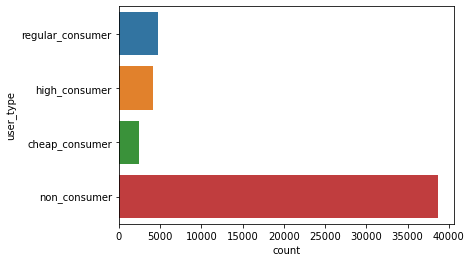

In [441]:
sns.countplot(y='user_type', data=final)

purchase & order_euros = DVs

piad_campaign_no_na &  ref_category = IVs

user_type &  ref_category = control variasbles 

<AxesSubplot:xlabel='paid_campaign_no_na', ylabel='purchase'>

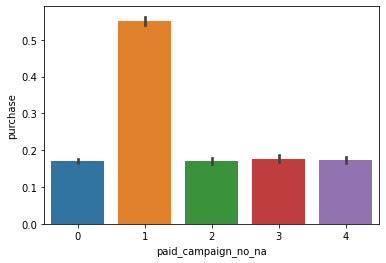

In [444]:
sns.barplot(x='paid_campaign_no_na', y='purchase', data=final)

<AxesSubplot:xlabel='paid_campaign_no_na', ylabel='order_euros'>

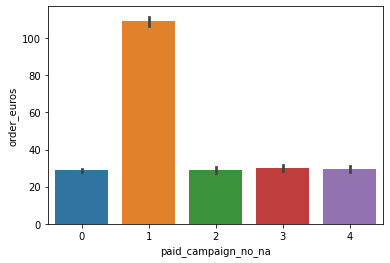

In [445]:
sns.barplot(x='paid_campaign_no_na', y='order_euros', data=final)

<AxesSubplot:xlabel='ref_category', ylabel='purchase'>

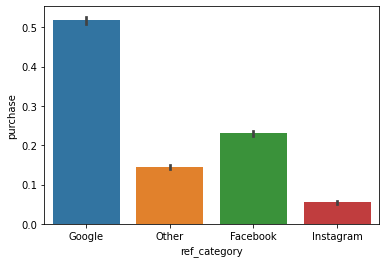

In [446]:
sns.barplot(x='ref_category', y='purchase', data=final)

<AxesSubplot:xlabel='ref_category', ylabel='order_euros'>

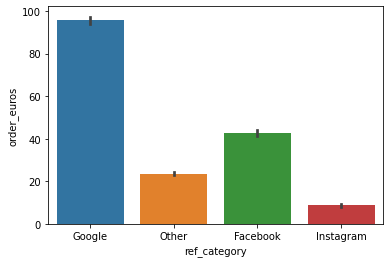

In [447]:
sns.barplot(x='ref_category', y='order_euros', data=final)

In [549]:
final.to_pickle('final.pkl')

## Challenge 2

For this challenge, we would like you to focus on sales (binary variable) as the DV.

You need to test the hypotheses and make predictions for each campaign using ML. In other words, you need to:
1. Create statistical models that (a) test whether the campaigns lead to a higher likelihood of a sale than the other campaigns, and (b) test whether the referral leads to a higher likelihood of a sale than the cpc campaign
2. Use ML to create similar models (as in 1), and use them to run predictions (e.g., what is the likelihood of a sale if someone came to the website via the referral campaign? Or from the CPC campaign? Or from other campaigns?)
3. Use LIME to explain the predictions created by the model, contrasting the importance of campaigns with the importance of device type and of location.

Don't forget to interpret the results in MarkDown, and indicate whether your hypotheses were supported, not supported (or even rejected).

## 

RQ3: to which extent the campaign used (1,2,3,4) to promote the article enhance a purchase?

RQ4: to which extent the platform (Google, Facebook, Instagram, Other) influence a purchase?

IV= campaign used

H1= Campaign1 positively stimulate purchases'amount (order_euros).

H2= The platform (Google) positively stimulate purchases'amount (order_euros).

In [511]:
ols_stat_1 = sm.OLS(final['order_euros'], sm.add_constant(final[['campaign1','campaign2','campaign3','campaign4', 'Google']]))

In [512]:
result_ols_1 = ols_stat_1.fit()

In [513]:
print(result_ols_1.summary())

                            OLS Regression Results                            
Dep. Variable:            order_euros   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     3568.
Date:                Wed, 25 May 2022   Prob (F-statistic):               0.00
Time:                        02:19:21   Log-Likelihood:            -2.8200e+05
No. Observations:               50000   AIC:                         5.640e+05
Df Residuals:                   49994   BIC:                         5.641e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8504      0.492     26.116      0.0

In [514]:
ols_clf = LinearRegression(fit_intercept = True)

In [515]:
ols_clf.fit(final[['campaign1','campaign2','campaign3','campaign4', 'Google']], final['order_euros'])

LinearRegression()

In [516]:
ols_clf.predict([[1,0,0,0,0]])

array([93.17067452])

In [517]:
ols_clf.predict([[1,0,0,0,1]])

array([164.0584188])

In [518]:
ols_clf.predict([[0,1,0,0,0]])

array([13.36877004])

In [519]:
ols_clf.predict([[0,1,0,0,1]])

array([84.25651431])

In [520]:
ols_clf.predict([[0,0,1,0,0]])

array([13.8849902])

In [521]:
ols_clf.predict([[0,0,1,0,1]])

array([84.77273448])

In [522]:
ols_clf.predict([[0,0,0,1,0]])

array([13.81507077])

In [523]:
ols_clf.predict([[0,0,0,1,1]])

array([84.70281504])

In [524]:
ols_stat_2 = sm.OLS(final['order_euros'], sm.add_constant(final[['campaign1','campaign2','campaign3','Other_campaigns', 'Google']]))

In [525]:
result_ols_2 = ols_stat_2.fit()

In [526]:
print(result_ols_2.summary())

                            OLS Regression Results                            
Dep. Variable:            order_euros   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     3568.
Date:                Wed, 25 May 2022   Prob (F-statistic):               0.00
Time:                        02:19:26   Log-Likelihood:            -2.8200e+05
No. Observations:               50000   AIC:                         5.640e+05
Df Residuals:                   49994   BIC:                         5.641e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              13.8151      0.823     

In [527]:
ols_clf_1 = LinearRegression(fit_intercept = True)

In [528]:
ols_clf_1.fit(final[['campaign1','campaign2','campaign3','Other_campaigns', 'Google']], final['order_euros'])

LinearRegression()

In [529]:
ols_clf_1.predict([[1,0,0,0,0]])

array([93.17067452])

In [531]:
ols_clf_1.predict([[0,1,0,0,0]])

array([13.36877004])

In [532]:
ols_clf_1.predict([[0,0,0,1,0]])

array([12.85036875])

In [533]:
ols_clf_1.predict([[1,0,0,0,1]])

array([164.0584188])

## Challenge 3

For this challenge, we would like you to focus on revenue (continuous variable) as the DV.

You need to test the hypotheses and make predictions for each campaign using ML. In other words, you need to:
1. Create statistical models that (a) test whether the campaigns lead to a higher revenue than the other campaigns, and (b) test whether the referral leads to a higher revenue of a sale than the cpc campaign
2. Use ML to create similar models (as in 1), and use them to run predictions (e.g., what is the expected revenue if someone came to the website via the referral campaign? Or from the CPC campaign? Or from other campaigns?)
3. Use LIME to explain the predictions created by the model, contrasting the importance of campaigns with the importance of device type and of location.

Don't forget to interpret the results in MarkDown, and indicate whether your hypotheses were supported, not supported (or even rejected).

In [537]:
logit_stats = sm.Logit(final['purchase'], sm.add_constant(final[['campaign1','campaign2','campaign3','campaign4', 'Google']]))

In [538]:
result_logit = logit_stats.fit()

Optimization terminated successfully.
         Current function value: 0.422397
         Iterations 6


In [539]:
print(result_logit.summary())

                           Logit Regression Results                           
Dep. Variable:               purchase   No. Observations:                50000
Model:                          Logit   Df Residuals:                    49994
Method:                           MLE   Df Model:                            5
Date:                Wed, 25 May 2022   Pseudo R-squ.:                  0.2110
Time:                        02:36:17   Log-Likelihood:                -21120.
converged:                       True   LL-Null:                       -26768.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3278      0.023    -99.548      0.000      -2.374      -2.282
campaign1      2.1570      0.034     64.311      0.000       2.091       2.223
campaign2      0.0213      0.040      0.533      0.5

In [540]:
logit_clf = LogisticRegression(max_iter=1000, fit_intercept = True)

In [541]:
logit_clf.fit(final[['campaign1','campaign2','campaign3','campaign4', 'Google']], final['purchase'])

LogisticRegression(max_iter=1000)

In [542]:
logit_clf.predict_proba([[0,0,0,0,0]])

array([[0.91100384, 0.08899616]])

In [543]:
logit_clf.predict_proba([[1,0,0,0,0]])

array([[0.54288719, 0.45711281]])

In [544]:
logit_clf.predict_proba([[1,0,0,0,1]])

array([[0.12257918, 0.87742082]])

In [545]:
logit_clf.predict_proba([[0,1,0,0,0]])

array([[0.90933938, 0.09066062]])

In [548]:
logit_clf.predict_proba([[0,1,0,0,1]])

array([[0.54125461, 0.45874539]])

In [546]:
logit_clf.predict_proba([[0,0,1,0,0]])

array([[0.90778606, 0.09221394]])

In [547]:
logit_clf.predict_proba([[0,0,0,1,0]])

array([[0.90766111, 0.09233889]])

In [550]:
logit_stats_2 = sm.Logit(final['purchase'], sm.add_constant(final[['campaign1','campaign2','campaign3','Other_campaigns', 'Google']]))

In [551]:
result_logit_2 = logit_stats_2.fit()

Optimization terminated successfully.
         Current function value: 0.422397
         Iterations 6


In [552]:
print(result_logit_2.summary())

                           Logit Regression Results                           
Dep. Variable:               purchase   No. Observations:                50000
Model:                          Logit   Df Residuals:                    49994
Method:                           MLE   Df Model:                            5
Date:                Wed, 25 May 2022   Pseudo R-squ.:                  0.2110
Time:                        02:54:02   Log-Likelihood:                -21120.
converged:                       True   LL-Null:                       -26768.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.2863      0.036    -63.011      0.000      -2.357      -2.215
campaign1           2.1155      0.044     48.570      0.000       2.030       2.201
campaign2          -0.0202      

In [553]:
logit_clf_2 = LogisticRegression(max_iter=1000, fit_intercept = True)

In [554]:
logit_clf_2.fit(final[['campaign1','campaign2','campaign3','Other_campaigns', 'Google']], final['purchase'])

LogisticRegression(max_iter=1000)

In [555]:
logit_clf.predict_proba([[0,0,0,1,0]])

array([[0.90766111, 0.09233889]])

In [556]:
logit_clf.predict_proba([[0,0,0,1,1]])

array([[0.53623756, 0.46376244]])